In [1]:
#!pip install voila
#!jupyter serverextension enable --sys-prefix voila

#import voila 
#import fastbook
#import os

#from fastbook import *
#Import widgets tool for this!
#from fastai.vision.widgets import *

In [2]:
# checking to see if file exists
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [3]:
learn_inf = load_learner(path/'export.pkl') #creating inference learner from exported file using load_learner

In [4]:
# learn_inf.predict('images/bird.jpg')
learn_inf.dls.vocab #checking categories

['crow', 'eagle', 'parakeet', 'parrot', 'toucan']

## Creating Widgets

In [5]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [6]:
# getting image to test out stuff # Commented out
#img = ['https://wallup.net/wp-content/uploads/2019/09/453527-parrot-bird-beak.jpg']
dest = 'images/parrot.jpg'
#download_url(ims[0],dest)

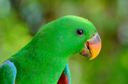

In [7]:
im = Image.open(dest)
im.to_thumb(128,128)

In [8]:
btn_upload = SimpleNamespace(data=['images/parrot.jpg'])

In [9]:
img = PILImage.create(btn_upload.data[-1])

In [10]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [11]:
pred,pred_idx,probs = learn_inf.predict(img)

In [12]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: parrot; Probability: 0.7761')

In [13]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [14]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
        
btn_run.on_click(on_click_classify)

In [15]:
btn_upload = widgets.FileUpload()

### Final Widget Code:

In [16]:
VBox([widgets.Label('Select your bird!'),
     btn_upload, btn_run, out_pl, lbl_pred])

## Turning Notebook into Application

In [17]:
#!pip install voila
#!jupyter serverextension enable --sys-prefix voila

#using Voila